In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
sample = 500
X = np.random.randint(10, 100, sample)
Y = 10 * np.random.normal(1, 0.1, sample) * X + 20 * np.random.normal(1, 0.1, sample)

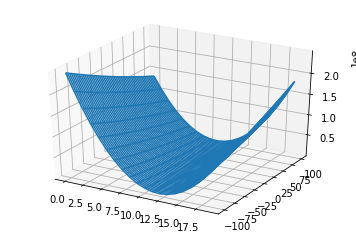

In [3]:
Axes3D = plt.axes(projection='3d')
ww, bb = np.meshgrid(range(20), range(-100,100), indexing='ij')
LL = []
for w in range(20):
    for b in range(-100,100):
        L = 0
        for n in range(sample):
            L += ( w * X[n] + b - Y[n] ) ** 2
        LL.append(L)
Axes3D.plot_wireframe(ww, bb, np.array(LL).reshape(20,200))

In [4]:
w = 0
b = 0
lr = 1
lr_w = 0
lr_b = 0
iteration = 100000
W = [w]
B = [b]

In [5]:
for _ in range(iteration):
    Lw = 0 # partial derivative of L with respect to w
    Lb = 0 # partial derivative of L with respect to b
    for n in range(sample):
        Lw += 2 * ( w * X[n] + b - Y[n] ) * X[n]
        Lb += 2 * ( w * X[n] + b - Y[n] ) * 1
    lr_w += Lw ** 2
    lr_b += Lb ** 2
    w -= lr / lr_w ** 0.5 * Lw
    b -= lr / lr_b ** 0.5 * Lb
    W.append(w)
    B.append(b)

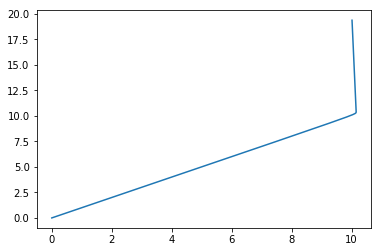

In [6]:
plt.plot(W, B)

In [7]:
W[-1], B[-1]

(10.013746054930072, 19.379955863846295)

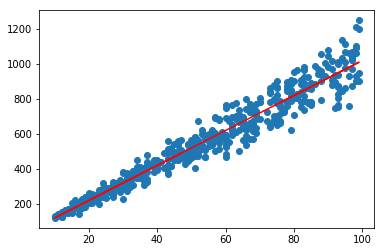

In [8]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
plt.scatter(X, Y)
plt.plot(X, model.predict(X.reshape(-1, 1)), color='red')